In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np
import pandas as pd
import json
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
from RiboGraphViz import RGV
from RiboGraphViz import LoopExtruder, StackExtruder
from ipynb.draw import draw_struct

from nnn.util import *
from nnn.fileio import *
from nnn.processing import *
from nnn.plotting import *
from nnn import motif_fit

import warnings
warnings.filterwarnings("ignore")

In [2]:
melt_file = './data/uv_melt/220225_WC2898.csv'

In [3]:
df = read_melt_file(melt_file).set_index('ramp')
annotation = read_annotation('./data/annotation/NNNlib2b_annotation_nupack.txt',
                             './data/annotation/NNN_mastertable.tsv')

In [9]:
annotation.query('RefSeq == "GTCAGGGAAACCTGAC"')

,Series,ConstructType,Scaffold,Scaffoldposition,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_NUPACK,ConstructClass
SEQID,,,,,,,,,,
WC1375,WatsonCrick,WC_6ntstem,GC,Bottom,GTCAGGGAAACCTGAC,-44.908888,-0.125232,85.454908,-6.011584,Watson Crick


In [49]:
df.loc['melt']

,Temperature_C,Abs
ramp,,
melt,4.020000,0.037338
melt,5.020000,0.037356
melt,6.020000,0.037490
melt,7.020000,0.037464
melt,8.020000,0.037347
...,...,...
melt,91.019997,0.040916
melt,92.019997,0.040854
melt,93.019997,0.041408


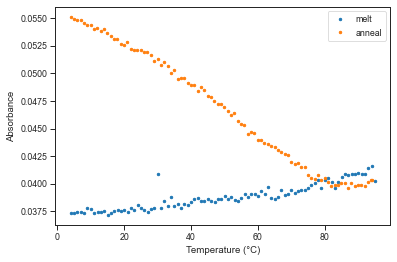

In [53]:
plt.plot(df.loc['melt','Temperature_C'], df.loc['melt','Abs'], '.')
plt.plot(df.loc['anneal','Temperature_C'], df.loc['anneal','Abs'], '.')
plt.legend(['melt', 'anneal'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Absorbance')
save_fig('./fig/UV_melt/WC2898.pdf')

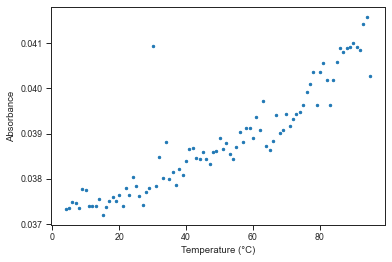

In [54]:
plt.plot(df.loc['melt','Temperature_C'], df.loc['melt','Abs'], '.')
# plt.plot(df.loc['anneal','Temperature_C'], df.loc['anneal','Abs'])
# plt.legend(['melt', 'anneal'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Absorbance')
save_fig('./fig/UV_melt/WC2898_melt_only.pdf')

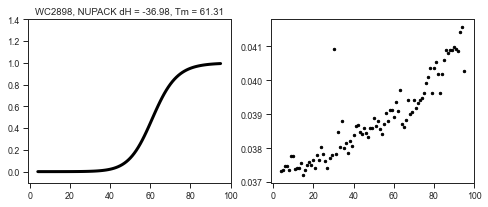

In [71]:
fig, ax = plt.subplots(1,2, sharex=True, figsize=(8,3))
plot_corrected_NUPACK_curve(annotation.loc['WC2898'], ax=ax[0], T_celsius=df.loc['melt', 'Temperature_C'])
ax[1].plot(df.loc['melt','Temperature_C'], df.loc['melt','Abs'], 'k.')
save_fig('./fig/UV_melt/WC2898_NUPACK_vs_melt.pdf')

In [72]:
annotation.loc['WC2898']

Series                 WatsonCrick
ConstructType           WC_5ntstem
Scaffold                       NaN
Scaffoldposition               NaN
RefSeq              CCATGGAAACATGG
dH_NUPACK               -36.979751
dS_NUPACK                -0.105028
Tm_NUPACK                78.943904
dG_37_NUPACK             -4.375536
ConstructClass        Watson Crick
Name: WC2898, dtype: object

# UV melt ordering

## WC 24 plate split and stem

split - broken at the middle of the loop, e.g. with GA+AA
stem - broken 5' and 3' strands of the stem region only

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run nnn/ipynb_init.py

df = pd.read_csv('./data/uv_melt/WC_24plate_sequence.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# !!only works for symmetric stems!!
split5 = lambda seq: seq[:int(len(seq) / 2)]
split3 = lambda seq: seq[int(len(seq) / 2):]
stem5 = lambda seq: seq[:int(len(seq) / 2) - 2]
stem3 = lambda seq: seq[int(len(seq) / 2) + 2:]

df['split_5p'] = df.RefSeq.apply(split5)
df['split_3p'] = df.RefSeq.apply(split3)
df['stem_5p'] = df.RefSeq.apply(stem5)
df['stem_3p'] = df.RefSeq.apply(stem3)
df

,SEQID,RefSeq,split_5p,split_3p,stem_5p,stem_3p
0,WC1106,GTTCAAGGAAACTTGAAC,GTTCAAGGA,AACTTGAAC,GTTCAAG,CTTGAAC
1,WC593,GACATTGGAAACAATGTC,GACATTGGA,AACAATGTC,GACATTG,CAATGTC
2,WC2318,GCAATAGGAAACTATTGC,GCAATAGGA,AACTATTGC,GCAATAG,CTATTGC
3,WC68,GAATTGGGAAACCAATTC,GAATTGGGA,AACCAATTC,GAATTGG,CCAATTC
4,WC209,GATATTGGAAACAATATC,GATATTGGA,AACAATATC,GATATTG,CAATATC
5,WC1048,GTTTCTGAAAAGAAAC,GTTTCTGA,AAAGAAAC,GTTTCT,AGAAAC
6,WC1394,GTCTAAGGAAACTTAGAC,GTCTAAGGA,AACTTAGAC,GTCTAAG,CTTAGAC
7,WC200,GATAAGGGAAACCTTATC,GATAAGGGA,AACCTTATC,GATAAGG,CCTTATC
8,WC578,GACAAAGGAAACTTTGTC,GACAAAGGA,AACTTTGTC,GACAAAG,CTTTGTC
9,WC1025,GTTTTTGGAAACAAAAAC,GTTTTTGGA,AACAAAAAC,GTTTTTG,CAAAAAC


In [14]:
df.to_csv('./data/uv_melt/WC_24plate_sequence_split.csv', index=None)

In [33]:
idt_df = df.drop(columns=['RefSeq']).melt(id_vars=['SEQID'], var_name=['name'], value_name='sequence')
idt_df['name'] = idt_df.apply(lambda row: f'{row.SEQID}_{row["name"]}', axis=1)
idt_df = idt_df.set_index('SEQID').sort_index()
idt_df['scale'] = '250nm'

In [34]:
idt_df.to_csv('./data/uv_melt/WC_24plate_sequence_split_IDT.csv', index=None)

### Example curves from figure 1

In [12]:
seqids = ['WC202', 'WC1375', 'WC2287']


In [15]:
df = annotation.loc[seqids]
df['stem_5p'] = df.RefSeq.apply(stem5)
df['stem_3p'] = df.RefSeq.apply(stem3)

In [17]:
df.to_csv('./data/uv_melt/WC_3examples_sequence_split.csv', index=None)

In [22]:
idt_df = df.reset_index()[['SEQID', 'RefSeq', 'stem_5p', 'stem_3p']].melt(id_vars=['SEQID'], var_name=['name'], value_name='sequence')

,SEQID,name,sequence
0,WC202,RefSeq,GATAACGAAAGTTATC
1,WC1375,RefSeq,GTCAGGGAAACCTGAC
2,WC2287,RefSeq,GGCCGGGAAACCGGCC
3,WC202,stem_5p,GATAAC
4,WC1375,stem_5p,GTCAGG
5,WC2287,stem_5p,GGCCGG
6,WC202,stem_3p,GTTATC
7,WC1375,stem_3p,CCTGAC
8,WC2287,stem_3p,CCGGCC


In [54]:
idt_df = df.reset_index()[['SEQID', 'RefSeq', 'stem_5p', 'stem_3p']].melt(id_vars=['SEQID'], var_name=['colname'], value_name='sequence')
idt_df['seqname'] = idt_df.apply(lambda row: f'{row.SEQID}_{row["colname"]}' if row["colname"]!='RefSeq' else row.SEQID, axis=1)
idt_df = idt_df.set_index('SEQID').sort_index()
idt_df['scale'] = idt_df.apply(lambda row: '250nm' if row["colname"]!='RefSeq' else '100nm', axis=1)
idt_df['purification'] = idt_df.apply(lambda row: 'PAGE' if row["colname"]!='RefSeq' else 'STD', axis=1)

In [55]:
idt_df = idt_df.set_index('seqname').drop(columns='colname').reset_index()

In [56]:
idt_df.to_csv('./data/uv_melt/WC_3examples_sequence_split_IDT.csv', index=None)

In [57]:
2*1e-9/(0.5*1e-3)

4e-06

In [59]:
idt_df.iloc[:3,:].to_csv('./data/uv_melt/WC1375_stem_IDT.csv', index=None)